In [1]:
import sys
sys.path.append('/home/raghav/sunbather2/src/') #add your path to /sunbather/src/ here

import tools
import RT
import construct_parker as cp

import matplotlib.pyplot as plt
import numpy as np

/home/raghav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/raghav/.local/lib/python3.10/site-packages/p_winds/tools.py:24: UserWarning: Environment variable PWINDS_REFSPEC_DIR is not set.
  warn("Environment variable PWINDS_REFSPEC_DIR is not set.")


In [2]:
pprof = tools.read_parker('WASP52b',9200,11.300,'z_10')

In [3]:
alt = pprof.alt.values
rho = pprof.rho.values

In [4]:
rho.size

1000

In [5]:
basepath = "/home/raghav/project_sb/sims/"
def atmabundance(filename):
    depths = []
    abund = []
    flag = 0
    with open(basepath+filename) as f:
        for line in f:
            words = line.split()
            if(flag==1 and '#' not in words[0]):
                if('end' in words):
                    break
                depths.append(float(words[0]))
                abund.append(float(words[1]))
            if (words[0] =='#' and 'abundance' in words):
                next(f)
                flag = 1
    depth_array = np.array(depths)
    abund_array = np.array(abund)
    xp = depth_array[1:]
    fp = abund_array[1:]
    x = np.linspace(depth_array[1],depth_array[-1],1000)
    y = np.interp(x,xp,fp)
    #ticks_array = xp
    return x,y,xp,fp


In [6]:
def get_abundances(zdict=None):
    """
    Returns a dictionary of the fractional abundances of each element (sums to 1).

    Parameters
    ----------
    zdict : dict, optional
        Dictionary with the scale factors of all elements relative
        to a solar composition. Can be easily created with get_zdict().
        Default is None, which results in a solar composition.

    Returns
    -------
    abundances : dict
        Dictionary with the abundances of all elements, expressed as a fraction of the total.
    """

    #solar abundance relative to hydrogen (Hazy table 7.1):
    rel_abundances = {'H':1., 'He':0.1, 'Li':2.04e-9, 'Be':2.63e-11, 'B':6.17e-10,
    'C':2.45e-4, 'N':8.51e-5, 'O':4.9e-4, 'F':3.02e-8, 'Ne':1e-4,
    'Na':2.14e-6, 'Mg':3.47e-5, 'Al':2.95e-6, 'Si':3.47e-5, 'P':3.2e-7,
    'S':1.84e-5, 'Cl':1.91e-7, 'Ar':2.51e-6, 'K':1.32e-7, 'Ca':2.29e-6,
    'Sc':1.48e-9, 'Ti':1.05e-7, 'V':1e-8, 'Cr':4.68e-7, 'Mn':2.88e-7,
    'Fe':2.82e-5, 'Co':8.32e-8, 'Ni':1.78e-6, 'Cu':1.62e-8, 'Zn':3.98e-8}

    if zdict != None:
        assert 'H' not in zdict.keys(), "You cannot scale hydrogen, scale everything else instead."
        for element in zdict.keys():
            rel_abundances[element] *= zdict[element]

    total = sum(list(rel_abundances.values()))
    abundances = {k: v / total for k, v in rel_abundances.items()}

    return abundances

In [7]:
W52sim = tools.Sim(tools.projectpath+'/sims/1D/WASP52b/z_10_Mg10/parker_9200_11.300/converged')

In [8]:
W52sim.abundances

{'H': 0.8979743332728762,
 'He': 0.08979743332728762,
 'Li': 1.8318676398766677e-08,
 'Be': 2.3616724965076644e-10,
 'B': 5.540501636293646e-09,
 'C': 0.0022000371165185467,
 'N': 0.0007641761576152176,
 'O': 0.0044000742330370934,
 'F': 2.711882486484086e-07,
 'Ne': 0.0008979743332728763,
 'Na': 1.921665073203955e-05,
 'Mg': 0.003115970936456881,
 'Al': 2.649024283154985e-05,
 'Si': 0.0003115970936456881,
 'P': 2.8735178664732038e-06,
 'S': 0.00016522727732220922,
 'Cl': 1.7151309765511936e-06,
 'Ar': 2.2539155765149194e-05,
 'K': 1.1853261199201966e-06,
 'Ca': 2.0563612231948867e-05,
 'Sc': 1.3290020132438568e-08,
 'Ti': 9.428730499365201e-07,
 'V': 8.979743332728762e-08,
 'Cr': 4.202519879717061e-06,
 'Mn': 2.5861660798258836e-06,
 'Fe': 0.0002532287619829511,
 'Co': 7.471146452830331e-07,
 'Ni': 1.5983943132257197e-05,
 'Cu': 1.4547184199020595e-07,
 'Zn': 3.5739378464260474e-07}

In [9]:
tools.get_abundances()

{'H': 0.9082244154709177,
 'He': 0.09082244154709178,
 'Li': 1.8527778075606721e-09,
 'Be': 2.3886302126885133e-11,
 'B': 5.603744643455562e-10,
 'C': 0.00022251498179037482,
 'N': 7.728989775657509e-05,
 'O': 0.00044502996358074964,
 'F': 2.742837734722171e-08,
 'Ne': 9.082244154709177e-05,
 'Na': 1.9436002491077636e-06,
 'Mg': 3.1515387216840845e-05,
 'Al': 2.679262025639207e-06,
 'Si': 3.1515387216840845e-05,
 'P': 2.9063181295069364e-07,
 'S': 1.6711329244664884e-05,
 'Cl': 1.7347086335494528e-07,
 'Ar': 2.2796432828320035e-06,
 'K': 1.1988562284216113e-07,
 'Ca': 2.0798339114284016e-06,
 'Sc': 1.3441721348969581e-09,
 'Ti': 9.536356362444636e-08,
 'V': 9.082244154709176e-09,
 'Cr': 4.250490264403895e-07,
 'Mn': 2.615686316556243e-07,
 'Fe': 2.561192851627988e-05,
 'Co': 7.556427136718036e-08,
 'Ni': 1.6166394595382333e-06,
 'Cu': 1.4713235530628867e-08,
 'Zn': 3.614733173574252e-08}

In [10]:
W52ovr = tools.process_overview(tools.projectpath+'/sims/1D/WASP52b/z_10_Mg10/parker_9200_11.300/converged.ovr')

In [11]:
W52ovr['mu']

0      0.602626
1      0.602626
2      0.602626
3      0.602626
4      0.602626
         ...   
261    0.652157
262    0.653324
263    0.655039
264    0.656554
265    0.657003
Name: mu, Length: 266, dtype: float64

In [12]:
W52ovr

,depth,Te,Htot,hden,eden,2H_2/H,HI,HII,HeI,HeII,...,O3,O4,O5,O6,H2O/O,AV(point),AV(extend),Tau912,rho,mu
0,2.500000e-01,1138.6,7.573000e-12,193080.0,240870.0,1.636000e-20,0.000138,0.99986,0.000013,0.033229,...,0.025906,0.530820,0.335820,9.740200e-02,1.175500e-36,0.0,0.0,8.402400e-17,4.575056e-19,0.602626
1,1.500000e+00,1138.6,7.573000e-12,193080.0,240870.0,1.636000e-20,0.000138,0.99986,0.000013,0.033229,...,0.025906,0.530820,0.335820,9.740200e-02,1.175500e-36,0.0,0.0,4.201200e-16,4.575056e-19,0.602626
2,6.500000e+00,1138.6,7.573000e-12,193080.0,240870.0,1.636000e-20,0.000138,0.99986,0.000013,0.033229,...,0.025906,0.530820,0.335820,9.740200e-02,1.175500e-36,0.0,0.0,1.764500e-15,4.575056e-19,0.602626
3,2.650000e+01,1138.6,7.573000e-12,193080.0,240870.0,1.636000e-20,0.000138,0.99986,0.000013,0.033229,...,0.025906,0.530820,0.335820,9.740200e-02,1.175500e-36,0.0,0.0,7.142100e-15,4.575056e-19,0.602626
4,6.330000e+01,1138.6,7.573000e-12,193080.0,240870.0,1.636000e-20,0.000138,0.99986,0.000013,0.033229,...,0.025906,0.530820,0.335820,9.740200e-02,1.175500e-36,0.0,0.0,1.413300e-14,4.575056e-19,0.602626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,6.287610e+10,6014.1,2.305000e-07,197780000.0,211450000.0,8.032800e-14,0.036033,0.96397,0.116330,0.804210,...,0.183280,0.001252,0.000011,1.175500e-36,7.565600e-27,0.0,0.0,5.589300e-02,4.686423e-16,0.652157
262,6.301250e+10,5992.0,2.561000e-07,210910000.0,224670000.0,9.783400e-14,0.038338,0.96166,0.124140,0.801670,...,0.165820,0.001004,0.000009,1.175500e-36,1.005500e-26,0.0,0.0,6.183700e-02,4.997540e-16,0.653324
263,6.314590e+10,5964.1,2.951000e-07,229820000.0,243510000.0,1.249800e-13,0.041743,0.95826,0.135130,0.797290,...,0.144550,0.000743,0.000007,1.175500e-36,1.476300e-26,0.0,0.0,7.100600e-02,5.445615e-16,0.655039
264,6.327830e+10,5942.4,3.289000e-07,245690000.0,259100000.0,1.516200e-13,0.044482,0.95552,0.144130,0.793030,...,0.129490,0.000588,0.000006,1.175500e-36,1.970500e-26,0.0,0.0,7.891100e-02,5.821657e-16,0.656554


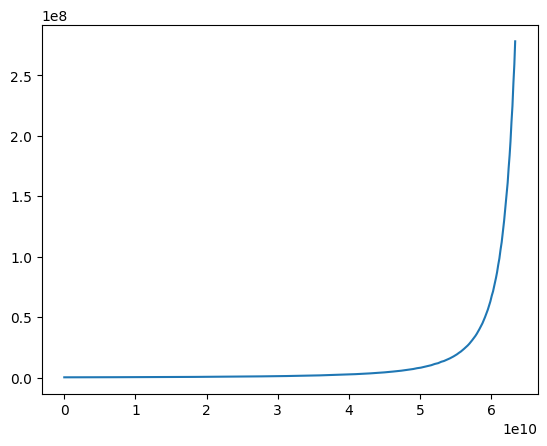

In [13]:
plt.plot(W52ovr['depth'],W52ovr['eden'])
plt.show()

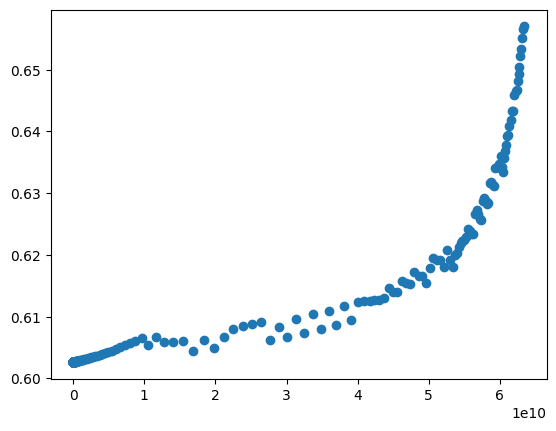

In [14]:
plt.scatter(W52ovr['depth'],W52ovr['mu'])
plt.show()

In [15]:
planet = tools.Planet('WASP52b')

In [16]:
planet.print_params()

Name: WASP52b
Full name: WASP-52 b
Planet radius: 9065185600.0 cm, 1.268 RJ
Star radius: 55010860000.0 cm, 0.79 Rsun
Semi-major axis: 406906209120.0 cm, 0.0272 AU
Planet mass: 8.7308e+29 g, 0.46 MJ
Star mass: 1.730517e+33 g, 0.8700000000000001 Msun
Transit impact parameter: 0.598 Rstar
Stellar spectrum name: eps_Eri_binned.spec
Roche radius: 22456406973.288425 cm, 3.141107672647069 RJ, 2.4772142528762373 Rp
log10(Gravitational potential): 12.808083063192056 log10(erg/g)
Orbital velocity semi-amplitude: 16852066.56104894 cm/s, 168.5206656104894 km/s


In [17]:
W52sim.altmax

8

In [18]:
W52x,W52y,W52xp,W52fp = atmabundance('1D/WASP52b/z_10_Mg10/Mg10_fractest_2/converged.in')

In [19]:
hden = tools.rho_to_hden(pprof.rho.values, abundances=tools.get_abundances())
dlaw = tools.alt_array_to_Cloudy(alt, hden, 8, planet.R, 1000, log=True)


In [20]:
dlaw

array([[-35.        ,   5.35384085],
       [ -1.9435928 ,   5.35384085],
       [ -1.8871856 ,   5.35384085],
       ...,
       [ 10.80215084,   8.47757054],
       [ 10.80231303,   8.48376846],
       [ 10.80247474,   8.48997876]])

In [21]:
hden.size

1000

In [22]:
alt.size

1000

In [23]:
pprof.values

array([[ 9.06518560e+09,  7.32213792e-16,  2.63875355e+05,
         7.08902929e-01, -4.40071160e-25],
       [ 9.09241045e+09,  7.20232919e-16,  2.66660754e+05,
         7.10511152e-01, -4.35224128e-25],
       [ 9.11971707e+09,  7.08481175e-16,  2.69462969e+05,
         7.12124205e-01, -4.25633489e-25],
       ...,
       [ 1.80219604e+11,  3.67573639e-20,  1.32996960e+07,
         6.64058355e-01, -6.03980926e-31],
       [ 1.80760845e+11,  3.64324019e-20,  1.33380888e+07,
         6.63983483e-01, -5.96874398e-31],
       [ 1.81303712e+11,  3.61102991e-20,  1.33765975e+07,
         6.63922287e-01, -5.93336829e-31]])

In [24]:
pprof

,alt,rho,v,mu,drhodr
0,9.065186e+09,7.322138e-16,2.638754e+05,0.708903,-4.400712e-25
1,9.092410e+09,7.202329e-16,2.666608e+05,0.710511,-4.352241e-25
2,9.119717e+09,7.084812e-16,2.694630e+05,0.712124,-4.256335e-25
3,9.147106e+09,6.969536e-16,2.722820e+05,0.713742,-4.162760e-25
4,9.174577e+09,6.856452e-16,2.751178e+05,0.714083,-4.071456e-25
...,...,...,...,...,...
995,1.791420e+11,3.741597e-20,1.322326e+07,0.664198,-6.184480e-31
996,1.796800e+11,3.708521e-20,1.326142e+07,0.664131,-6.111718e-31
997,1.802196e+11,3.675736e-20,1.329970e+07,0.664058,-6.039809e-31
998,1.807608e+11,3.643240e-20,1.333809e+07,0.663983,-5.968744e-31


In [25]:
def mu_HHe(Hefrac):
    '''
    This function takes an array of Helium abundances varying with radius and calculates the mean molecular weight. It assumes 0 ionization.
    The input parameter is temporary, it will probably be different after I incorporate crossover mass. The array should be something like [1.0e-10, 1.019e-10, 1.023e-10,......,1,9.8e-02,1.0e-01] 
    but can also be descending order
    '''
    h_fraction = 1-Hefrac
    he_h_fraction = Hefrac / h_fraction
    mean_f_ion = 0.0
    mu_array = (1 + 4*he_h_fraction)/(1 + he_h_fraction + mean_f_ion)

    mu_0 = np.mean(mu_array)
    return mu_0

In [26]:
def muarray(Hefrac,f_r):
    '''
    This function takes an array of Helium abundances varying with altitude and the fraction of ionized hydrogen with planetary radius, and returns array of mean molecular weights with altitude.
    It assumes no Helium ionization. The input parameter Hefrac is temporary, it will probably be different after I incorporate crossover mass. The array should be something like [1.0e-10, 1.019e-10, 1.023e-10,......,1,9.8e-02,1.0e-01] 
    but can also be descending order
    '''
    h_fraction = 1-Hefrac
    mu_array = ((1-h_fraction)*4.0 + h_fraction)/(h_fraction*(1+f_r)+(1-h_fraction))
    return mu_array

In [27]:
x1,y1,xp1,fp1 = atmabundance('HeDepthTest_5100_10.950/converged.in')
mu_0 = mu_HHe(10**y1)

In [28]:
mu_0

1.0179010180958206

In [29]:
planet1 = tools.Planet('hotNeptune')
spec = cp.cloudy_spec_to_pwinds(tools.cloudypath+'data/SED/'+planet1.SEDname, 1., (planet1.a - 20*planet1.R)/tools.AU)
f_r_test = cp.save_plain_parker_profile(planet1,10.9,5100,spec,h_fraction=0.9,pdir='test1',overwrite=True)

Parker wind profile done: /home/raghav/project_sb/parker_profiles/hotNeptune/test1/pprof_hotNeptune_T=5100_M=10.900.txt


In [30]:
pprof_hotNep = tools.read_parker('hotNeptune',5100,10.900,'test1')
original_muarray = pprof_hotNep.mu.values
hotNep_altarray = pprof_hotNep.alt.values

In [31]:
y1rev = np.flip(y1)

In [32]:
frac_muarray = muarray(10**y1rev,f_r_test)

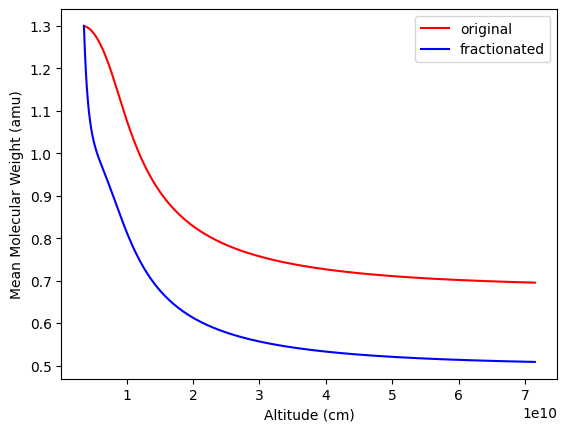

In [33]:
plt.plot(hotNep_altarray,original_muarray,color='red',label = 'original')
plt.plot(hotNep_altarray,frac_muarray,color='blue', label = 'fractionated')
plt.legend()
plt.ylabel('Mean Molecular Weight (amu)')
plt.xlabel('Altitude (cm)')
plt.show()


In [12]:
WASPplanet = tools.Planet('WASP52b')
pprof_WASP52 = tools.read_parker('WASP52b',9200,11.300,'z_1')
WASP52_altarray = pprof_WASP52.alt.values